### Create data

In [1]:
import pandas as pd 
import seaborn as sns
import numpy as np
import os
import matplotlib.pyplot as plt


In [2]:
# Define the directory where your datasets are stored
data_directory = "F:\\COVID-19-master\\csse_covid_19_data\\csse_covid_19_daily_reports"
files = os.listdir(data_directory)

# Filter the list to include only CSV files (or any specific format you are using)
csv_files = [file for file in files if file.endswith('.csv')]

# Initialize an empty list to store DataFrames
dataframes = []

# Loop through the CSV files and read them into DataFrames
for csv_file in csv_files:
    file_path = os.path.join(data_directory, csv_file)
    df = pd.read_csv(file_path)
    dataframes.append(df)

# Combine all DataFrames into a single DataFrame
combined_dataframe = pd.concat(dataframes, ignore_index=True)



In [3]:
# Convert 'Last_Update' to datetime
combined_dataframe['Last_Update'] = pd.to_datetime(combined_dataframe['Last_Update'], errors='coerce')

# Check the data type to ensure it is datetime
print("Data type of 'Last_Update':", combined_dataframe['Last_Update'].dtype)

# Handle cases where conversion failed (optional, based on your needs)
if combined_dataframe['Last_Update'].isnull().any():
    print("Some 'Last_Update' values could not be converted to datetime.")

# Create separate 'date' and 'time' columns
combined_dataframe['date'] = combined_dataframe['Last_Update'].dt.date
combined_dataframe['time'] = combined_dataframe['Last_Update'].dt.time

# Display the updated DataFrame
print(combined_dataframe)

Data type of 'Last_Update': datetime64[ns]
Some 'Last_Update' values could not be converted to datetime.
         FIPS Admin2 Province_State        Country_Region         Last_Update  \
0         NaN    NaN            NaN           Afghanistan 2021-01-02 05:22:33   
1         NaN    NaN            NaN               Albania 2021-01-02 05:22:33   
2         NaN    NaN            NaN               Algeria 2021-01-02 05:22:33   
3         NaN    NaN            NaN               Andorra 2021-01-02 05:22:33   
4         NaN    NaN            NaN                Angola 2021-01-02 05:22:33   
...       ...    ...            ...                   ...                 ...   
4287468   NaN    NaN            NaN    West Bank and Gaza 2023-01-01 04:21:00   
4287469   NaN    NaN            NaN  Winter Olympics 2022 2023-01-01 04:21:00   
4287470   NaN    NaN            NaN                 Yemen 2023-01-01 04:21:00   
4287471   NaN    NaN            NaN                Zambia 2023-01-01 04:21:00   
4287

In [4]:
combined_dataframe = combined_dataframe.drop(columns = ['FIPS', 'Admin2', 'Province_State','Last Update', 'Last_Update', 'Incident_Rate',
        'Combined_Key','Province/State', 'Country/Region','Latitude',
       'Longitude', 'time' ,'Incidence_Rate', 'Case-Fatality_Ratio'])
combined_dataframe.head(10)

,Country_Region,Lat,Long_,Confirmed,Deaths,Recovered,Active,Case_Fatality_Ratio,date
0,Afghanistan,33.93911,67.709953,52513.0,2201.0,41727.0,8585.0,4.191343,2021-01-02
1,Albania,41.15330,20.168300,58316.0,1181.0,33634.0,23501.0,2.025173,2021-01-02
2,Algeria,28.03390,1.659600,99897.0,2762.0,67395.0,29740.0,2.764848,2021-01-02
3,Andorra,42.50630,1.521800,8117.0,84.0,7463.0,570.0,1.034865,2021-01-02
4,Angola,-11.20270,17.873900,17568.0,405.0,11146.0,6017.0,2.305328,2021-01-02
5,Antigua and Barbuda,17.06080,-61.796400,159.0,5.0,148.0,6.0,3.144654,2021-01-02
6,Argentina,-38.41610,-63.616700,1629594.0,43319.0,1426676.0,159599.0,2.658269,2021-01-02
7,Armenia,40.06910,45.038200,159738.0,2828.0,143355.0,13555.0,1.770399,2021-01-02
8,Australia,-35.47350,149.012400,118.0,3.0,114.0,1.0,2.542373,2021-01-02
9,Australia,-33.86880,151.209300,4947.0,54.0,0.0,4893.0,1.091571,2021-01-02


In [5]:
arab=[
    'Algeria', 'Bahrain', 'Comoros', 'Djibouti', 'Egypt', 'Iraq', 'Jordan', 'Kuwait',
    'Lebanon', 'Libya', 'Mauritania', 'Morocco', 'Oman', 'Palestine', 'Qatar',
    'Saudi Arabia', 'Somalia', 'Sudan', 'Syria', 'Tunisia', 'United Arab Emirates', 'Yemen'
]
arab=combined_dataframe[combined_dataframe['Country_Region'].isin(arab)]
arab


arab.to_csv('arabData.csv', sep=',', index=False, encoding='utf-8')

### Import data

In [6]:
arab=pd.read_csv("arabData.csv")
arab

,Country_Region,Lat,Long_,Confirmed,Deaths,Recovered,Active,Case_Fatality_Ratio,date
0,Algeria,28.033900,1.659600,99897.0,2762.0,67395.0,29740.0,2.764848,2021-01-02
1,Bahrain,26.027500,50.550000,92913.0,352.0,90369.0,2192.0,0.378849,2021-01-02
2,Comoros,-11.645500,43.333300,823.0,10.0,705.0,108.0,1.215067,2021-01-02
3,Djibouti,11.825100,42.590300,5840.0,61.0,5735.0,44.0,1.044521,2021-01-02
4,Egypt,26.820553,30.802498,139471.0,7687.0,112826.0,18958.0,5.511540,2021-01-02
...,...,...,...,...,...,...,...,...,...
22678,Sudan,12.862800,30.217600,63686.0,4994.0,NaN,NaN,7.841598,2023-01-01
22679,Syria,34.802075,38.996815,57423.0,3163.0,NaN,NaN,5.508246,2023-01-01
22680,Tunisia,33.886917,9.537499,1147571.0,29284.0,NaN,NaN,2.551825,2023-01-01
22681,United Arab Emirates,23.424076,53.847818,1047008.0,2348.0,NaN,NaN,0.224258,2023-01-01


### EDA

In [7]:
arab.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22683 entries, 0 to 22682
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Country_Region       22683 non-null  object 
 1   Lat                  22683 non-null  float64
 2   Long_                22683 non-null  float64
 3   Confirmed            22683 non-null  float64
 4   Deaths               22683 non-null  float64
 5   Recovered            10461 non-null  float64
 6   Active               10461 non-null  float64
 7   Case_Fatality_Ratio  17871 non-null  float64
 8   date                 22551 non-null  object 
dtypes: float64(7), object(2)
memory usage: 1.6+ MB


In [8]:
arab.columns

Index(['Country_Region', 'Lat', 'Long_', 'Confirmed', 'Deaths', 'Recovered',
       'Active', 'Case_Fatality_Ratio', 'date'],
      dtype='object')

In [9]:
print(arab.isnull().sum())

Country_Region             0
Lat                        0
Long_                      0
Confirmed                  0
Deaths                     0
Recovered              12222
Active                 12222
Case_Fatality_Ratio     4812
date                     132
dtype: int64


In [10]:
arab = arab.drop(columns = ['Recovered','Active'])

In [11]:
# Calculate the case fatality ratio
arab['case_fatality_ratio'] = (arab['Deaths'] / arab['Confirmed']) * 100

# Handle missing values
arab['case_fatality_ratio'] = arab['case_fatality_ratio'].fillna(0) 
arab

,Country_Region,Lat,Long_,Confirmed,Deaths,Case_Fatality_Ratio,date,case_fatality_ratio
0,Algeria,28.033900,1.659600,99897.0,2762.0,2.764848,2021-01-02,2.764848
1,Bahrain,26.027500,50.550000,92913.0,352.0,0.378849,2021-01-02,0.378849
2,Comoros,-11.645500,43.333300,823.0,10.0,1.215067,2021-01-02,1.215067
3,Djibouti,11.825100,42.590300,5840.0,61.0,1.044521,2021-01-02,1.044521
4,Egypt,26.820553,30.802498,139471.0,7687.0,5.511540,2021-01-02,5.511540
...,...,...,...,...,...,...,...,...
22678,Sudan,12.862800,30.217600,63686.0,4994.0,7.841598,2023-01-01,7.841598
22679,Syria,34.802075,38.996815,57423.0,3163.0,5.508246,2023-01-01,5.508246
22680,Tunisia,33.886917,9.537499,1147571.0,29284.0,2.551825,2023-01-01,2.551825
22681,United Arab Emirates,23.424076,53.847818,1047008.0,2348.0,0.224258,2023-01-01,0.224258


In [12]:
arab=arab.drop(columns = ['Case_Fatality_Ratio' ])


<Axes: >

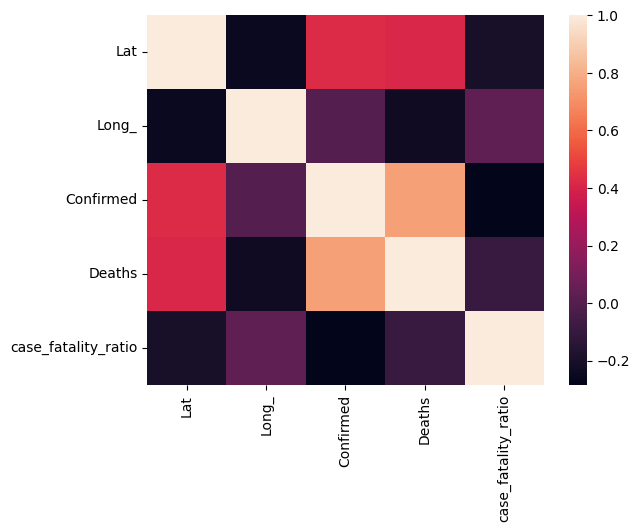

In [13]:
rdf=arab.drop(columns = ['Country_Region','date' ])
relation=rdf.corr()
sns.heatmap(relation)

In [14]:
arab.describe()

,Lat,Long_,Confirmed,Deaths,case_fatality_ratio
count,22683.000000,22683.000000,2.268300e+04,22683.000000,22683.000000
mean,23.125664,33.838929,3.652050e+05,5152.629502,3.228314
std,10.915735,19.600687,4.983022e+05,7102.478092,4.683733
min,-11.645500,-10.940800,1.000000e+00,0.000000,0.000000
25%,21.007900,30.217600,1.563100e+04,444.000000,0.941455
50%,26.027500,42.590300,1.429920e+05,2090.000000,1.546392
75%,31.240000,47.481766,5.156450e+05,6875.000000,3.729541
max,34.802075,55.923255,2.465545e+06,29341.000000,50.000000


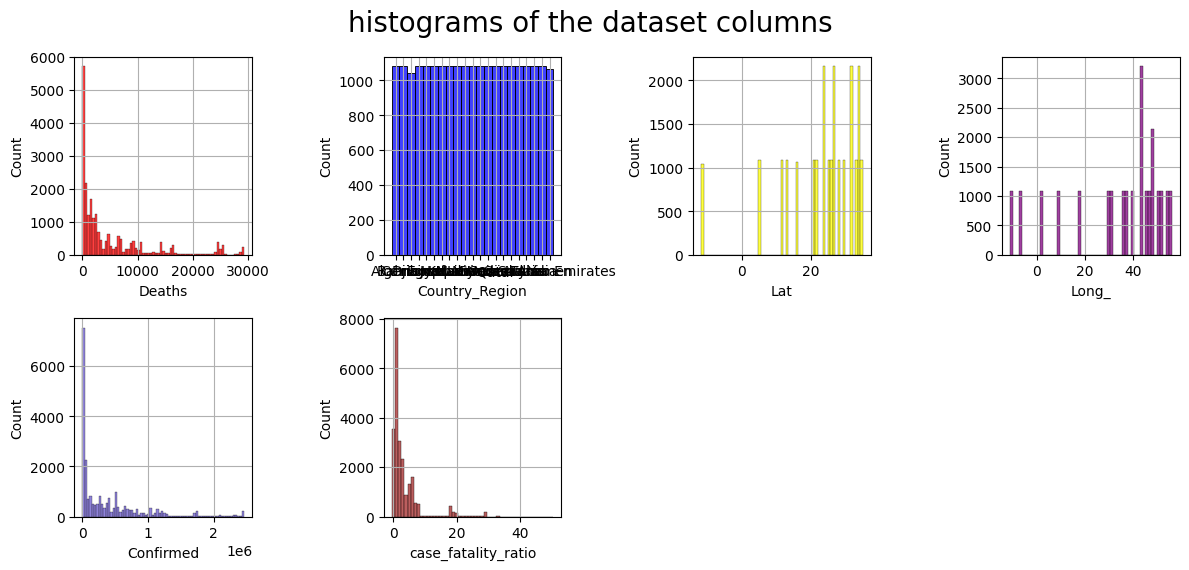

In [15]:
fig= plt.figure(figsize=(12,8))

plt.subplot(3,4,1)
sns.histplot(arab['Deaths'],color='red')
plt.xlabel("Deaths")
plt.grid()

plt.subplot(3,4,2)
sns.histplot(arab['Country_Region'],color='blue')
plt.xlabel("Country_Region")
plt.grid()

plt.subplot(3,4,3)
sns.histplot(arab['Lat'],color='yellow')
plt.xlabel("Lat")
plt.grid()

plt.subplot(3,4,4)
sns.histplot(arab['Long_'],color='purple')
plt.xlabel("Long_")
plt.grid()

plt.subplot(3,4,5)
sns.histplot(arab['Confirmed'],color='slateblue')
plt.xlabel("Confirmed")
plt.grid()


plt.subplot(3,4,6)
sns.histplot(arab['case_fatality_ratio'],color='brown' , discrete=True)
plt.xlabel("case_fatality_ratio")
plt.grid()


plt.suptitle("histograms of the dataset columns " ,fontsize = 20 )
plt.tight_layout()

In [16]:
arab.set_index(['date'],inplace=True,)
arab.index.names=['date']

In [17]:
print(arab.isnull().sum())

Country_Region         0
Lat                    0
Long_                  0
Confirmed              0
Deaths                 0
case_fatality_ratio    0
dtype: int64


In [18]:
import plotly.express as px
# Create a scatter plot with Viridis color palette
fig = px.scatter(arab, x='Country_Region', y='Deaths', size='Confirmed', color='Deaths', 
                 color_discrete_sequence=px.colors.sequential.Viridis, title='Deaths COVID-19 Cases in Arab Countries')

# Update layout for better readability
fig.update_layout(xaxis_title='Country', yaxis_title='Deaths Cases')

# Show the scatter plot
fig.show()

In [19]:
fig2=px.pie(arab,values='Deaths', names = 'Country_Region',color_discrete_sequence=['#636EFA', '#EF553B', '#00CC96'])
fig2.update_layout(
    title_text='Distribution of Deaths by Country',
    title_font_size=20,
    title_font_family='Roboto',                # Modern and clean font
    title_x=0.5,                              # Center the title
    title_xanchor='center',
    legend_title_text='Country/Region',
    legend_title_font_size=16,
    legend_font_size=14,
    legend_font_family='Roboto',               # Consistent font with title
    legend_orientation='h',                    # Horizontal legend
    margin=dict(t=40, b=40, l=40, r=40),      # Balanced margins
    height=500,                               # Appropriate height
    width=1000                                 # Appropriate width
)


# Show the figure
fig2.show()

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression

In [21]:
arab

,Country_Region,Lat,Long_,Confirmed,Deaths,case_fatality_ratio
date,,,,,,
2021-01-02,Algeria,28.033900,1.659600,99897.0,2762.0,2.764848
2021-01-02,Bahrain,26.027500,50.550000,92913.0,352.0,0.378849
2021-01-02,Comoros,-11.645500,43.333300,823.0,10.0,1.215067
2021-01-02,Djibouti,11.825100,42.590300,5840.0,61.0,1.044521
2021-01-02,Egypt,26.820553,30.802498,139471.0,7687.0,5.511540
...,...,...,...,...,...,...
2023-01-01,Sudan,12.862800,30.217600,63686.0,4994.0,7.841598
2023-01-01,Syria,34.802075,38.996815,57423.0,3163.0,5.508246
2023-01-01,Tunisia,33.886917,9.537499,1147571.0,29284.0,2.551825


### Training different models on our dataset

In [22]:
# Splitting the data into features and target
X = arab.drop(columns=['Deaths'])
y = arab['Deaths']

# Identify the categorical features
categorical_features = ['Country_Region']
numeric_features = [ 'Lat', 'Long_', 'Confirmed', 
       'case_fatality_ratio']

# Preprocessing the data: OneHotEncode the categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), categorical_features),
        ('num', 'passthrough', numeric_features)
    ])

# Transform the features
X_preprocessed = preprocessor.fit_transform(X)

# Splitting the preprocessed data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_preprocessed, y, test_size=0.2, random_state=42)

# Fit the Linear Regression model
reg = LinearRegression()
reg.fit(X_train, y_train)
reg.score(X_train, y_train)

0.6424401697855546

In [23]:
from sklearn.ensemble import RandomForestRegressor
Rmodel = RandomForestRegressor(n_estimators=100, random_state=42)
Rmodel.fit(X_train, y_train)
Rmodel.score(X_train, y_train)

0.9999979653852284